In [1]:
# this script is to evaluate all of the villar x roadmap x species sequence alignments without having to run the entire method2_v1,2,3 scripts

import os, sys
import pandas
import glob
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
plt.style.use('seaborn-deep')
today = datetime.date.today()

In [2]:
roadmap_path = "/dors/capra_lab/users/fongsl/roadmap/stringent/"
result_path = "/dors/capra_lab/users/fongsl/broadly_active_enhancers/data/villar_ref_data/"
os.chdir(result_path)

In [3]:
# This dataframe is called "short_vrs" in the method2_v3.py script

vrs = pandas.read_csv('%sshort_villar_x_roadmap_x_species_overlap.csv'%result_path, sep = '\t')

In [4]:
#Calculate the percentile of Villar overlap
vrs["percentile"]=(vrs["sum"].rank(pct=True)).round(2)

In [5]:
print("This is the dataframe of Villar hLiver x Roadmap x Villar species liver activity and alignment peaks \n\n #COLUMN HEADERS\n sum = number of Roadmap samples Villar Overlaps\n 90_percentile binary. 0= peak not in 90th percentile roadmap peak overlap. 1= peak in 90th percentile roadmap peak overlap")
print(" act_sp = the number of species with peak activity\n aln_sp = the number of species with alignable peak-sequences\n hq = 10 High Quality sequencing datasets\n inact = species with alignable peak sequences, but no active peaks. \n length = length of peak \n percentile = percentile overlap in other roadmap tissues.")
vrs.head()
#vrs.to_csv("%svrs_for_R.csv" %result_path, index = False, sep = '\t', header =True)

This is the dataframe of Villar hLiver x Roadmap x Villar species liver activity and alignment peaks 

 #COLUMN HEADERS
 sum = number of Roadmap samples Villar Overlaps
 90_percentile binary. 0= peak not in 90th percentile roadmap peak overlap. 1= peak in 90th percentile roadmap peak overlap
 act_sp = the number of species with peak activity
 aln_sp = the number of species with alignable peak-sequences
 hq = 10 High Quality sequencing datasets
 inact = species with alignable peak sequences, but no active peaks. 
 length = length of peak 
 percentile = percentile overlap in other roadmap tissues.


,v-chr,v-start,v-end,IDs,sum,90_percentile,act_sp,aln_sp,hq_act_sp,hq_aln_sp,aln_inact,hq_aln_inact,length,percentile
0,chr20,270226,272388,hsaH3K27Ac23366,0.0,0.0,2,9,1,7,7,6,2162,0.02
1,chr10,126076962,126079574,hsaH3K27Ac5900,0.0,0.0,0,0,0,0,0,0,2612,0.02
2,chr10,123358043,123358739,hsaH3K27Ac5855,0.0,0.0,5,12,2,5,7,3,696,0.02
3,chr19,7981384,7983285,hsaH3K27Ac18766,0.0,0.0,2,9,2,6,7,4,1901,0.02
4,chr2,200319976,200321620,hsaH3K27Ac22657,0.0,0.0,3,15,2,8,12,6,1644,0.02


In [7]:
#Fong analysis - Which peaks in villar are broadly active? In Humans? In all species?
#Activity = Some species
#Alignable = Some species, not all species?

#Human specific peaks
#Activity = human only
#Alignable= human only
aln_h = vrs.loc[vrs["hq_aln_sp"]==vrs["hq_aln_sp"].min()] 
#aln_h = vrs.loc[vrs["aln_sp"]==vrs["aln_sp"].min()] #this is ANY alignability to ANY species.

# save the h-specific coordinates
hspecific_out = aln_h[["v-chr", "v-start", "v-end"]]
print(hspecific_out.head())
hspecific_out.to_csv("%shspecific_villar_bae_hq_aln.bed"%result_path, index = False, sep = '\t', header =True)
act_h = vrs.loc[vrs["hq_act_sp"]==vrs["hq_act_sp"].min()] 

    v-chr    v-start      v-end
1   chr10  126076962  126079574
12   chr2  216876614  216878718
19   chr2  220158896  220160527
23   chr2  232476494  232480702
62  chr19   14317030   14318173


In [ ]:
print(len(act_h), "human-specific activity, +/- alignable to other HQ species. Below is the dataframe.")
act_h.head()

In [ ]:
print(len(aln_h), "human-specific activity, peaks not alignable to other species")

aln_h.head()

In [ ]:
#Repeat Alex's results - HUMAN + 9 HQ species
#Activity = Human or All species
#Alignable = All species
fish_df = vrs.loc[vrs["hq_aln_sp"]==vrs["hq_aln_sp"].max()] 

#Conserved activity
#Activity = All species
#Alignability = All species
fish_c = fish_df.loc[fish_df["hq_act_sp"]==fish_df["hq_act_sp"].max()] 

#Human-specific
#Activity = Human only
#alignability = All species 
fish_h = fish_df.loc[fish_df["hq_act_sp"]==fish_df["hq_act_sp"].min()] # find only HQ species with active ChIP Peaks in humans only.

print("Let's look at Alex's findings, which looked at enhancers where peaks were alignable in all HQ species\n")
print(len(fish_df), "FISH = all alignable peaks among HQ species, regardless of activity") 
print(len(fish_c), "= number of conserved activity in HQ species")
print(len(fish_h), "= number of human-specific activity, alignable to all HQ species")

fish_df.head()
#fish_h.head()

In [ ]:
###PIVOT TABLES FOR GRAPHING ###

#Fong
#Active = Humans + other species
#Alignable = 0-9 species 
act=vrs.pivot(columns='hq_act_sp', values='length') 

#Active = humans only
#Alignable = some species + All 10 species
aln_inact=vrs.pivot(columns='hq_aln_inact', values='length')
aln_act=vrs.pivot(columns='hq_aln_sp', values='length')

#Fong
#Sum x length
vrs_p= vrs.pivot(columns = "sum", values = "length")
aln_hp= aln_h.pivot(columns = "sum", values = "length")

#Fish
#Active = Humans + other species
#Alignable = All 10 species
fish = fish_df.pivot(columns='hq_act_sp', values='length')

#Sum x length
fish_p = fish_df.pivot(columns = "sum", values = "length")
fish_hp = fish_h.pivot(columns = "sum", values = "length")
fish_cp = fish_c.pivot(columns = "sum", values = "length")

print("example of pivoted table")
vrs_p.head()

In [ ]:
#FISH PLOT
#Activity = 0-9 species
#Alignable = All species

#Question - How long are species-specific/ broadly conserved active enhancers whose sequences is conserved across all species?
# hypothesis - 
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.4

fish.plot(kind='box', color='red', ax=ax)
plt.yscale('log')

ax.set_xlabel('No. Active Species ')
ax.set_ylabel('Length of Active Enhancers')
ax.set_title("Human enhancers\n Active in all/some/none species\nAlignable in ALL species\n Fish results")

print("Fish's Results")
plt.show()


In [ ]:
#FONG plot
#Acivity = 0-9 Species
#Alignability = 0-9 species

print("Question - How long are human active enhancers active also active in N other species?")

print("NOTE- THIS ANALYSIS != FISH ANALYSIS. Enhancer sequence does not have to be present in all species.")

#Question - what are is the length of active human enhancers also active in N other species?

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(221) # Create matplotlib axes

width = 0.4

bp = act.plot(kind='box', color='blue', ax=ax, figsize =(18,10))
plt.yscale('log')
ax.set_xlabel('No. Alignable Species +Activity')
ax.set_ylabel('Length of Active-Enhancers')
ax.set_title("Human enhancers \n Active in N species\n Alignable in all/some/none species")

plt.show()

print("Results agree with Fish's results on conserved-alignability v. enhancer activity, but remember, it is not required that active peaks are alignable")

#Question - what are is the length of active human enhancers NOT active, but alignable in other species?
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(221) # Create matplotlib axes
aln_inact.plot(kind='box', color='grey', ax=ax, figsize =(18,10))
ax.set_xlabel('No. Alignable Species -Activity')
ax.set_ylabel('Length of Enhancers')
ax.set_title("Human enhancers \n Active only in humans\n Alignable in N species")

plt.yscale('log')
plt.show()
print("This plot shows active Human enhancers alignable in other species, but it is required those species do not have enhancer activity")

#Question - what are is the length of active human enhancers NOT active, but alignable in other species?
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(221) # Create matplotlib axes
aln_act.plot(kind='box', color='green', ax=ax, figsize =(18,10))
ax.set_xlabel('No. Alignable Species +/-Activity')
ax.set_ylabel('Length of Enhancers')
ax.set_title("Human enhancers \n *May be* Active in species\n Alignable in N species")

plt.yscale('log')
plt.show()

In [ ]:
#plot sum of tissue overlap x length

#PLOT 1 
#Question: How long are human-liver villar enhancer peaks and how many roadmap samples are those found in?
#hypothesis - these conserved-sequence peaks represent old DNA. The longer they are, the more tissues they overlap.

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.4

bp = vrs_p.plot(kind='box', color='black', ax=ax, figsize =(24,12), rot=45 )
print("n=", len(vrs_p),"Human Villar enhancers")
print("n=", len(vrs.loc[vrs["sum"]>=40])," broadly active enhancers in Villar")
plt.yscale('log')
ax.set_xlabel('No. Active Samples')

ax.set_ylabel('Length of Active-Enhancers')
ax.set_title("Villar all human enhancers \n No. Roadmap Samples x Length")
#ax2.set_ylabel('Price')

plt.show()

#PLOT 2 
#Question: How long are conserved-sequence peaks and how many roadmap samples are those found in?
#hypothesis - these conserved-sequence peaks represent old DNA. The longer they are, the more tissues they overlap.

fig = plt.figure()
ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.4

bp = fish_p.plot(kind='box', color='red', ax=ax, figsize =(24,12), rot=45 )

print("n=", len(fish_p)," enhancers alignable in all 10 species")
print("n=", len(fish_df.loc[fish_df["sum"]>=40])," broadly active enhancers alignable in all 10 species")
plt.yscale('log')
ax.set_xlabel('No. Active Samples')

ax.set_ylabel('Length of Active-Enhancers')
ax.set_title("Villar human enhancers in FISH-Analysis \n No. Roadmap Samples x Length")
#ax2.set_ylabel('Price')

plt.show()

#PLOT 3 
#Question: How long are Human-only alignable peaks and how many roadmap samples are those found in?
#hypothesis - these human-only alignments represent young DNA. The longer they are, the more tissues they overlap.
fig = plt.figure()
ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.4

bp = aln_hp.plot(kind='box', color='purple', ax=ax, figsize =(24,12), rot=45)

print("n=", len(aln_hp)," enhancers not alignable in any 9 non-human species")
print("n=", len(aln_h.loc[aln_h["sum"]>=40])," broadly active enhancers not alignable in any 9 non-human species")
plt.yscale('log')
ax.set_xlabel('No. Active Samples')

ax.set_ylabel('Length of Active-Enhancers')
ax.set_title("Villar human enhancers NOT alignable in other species \n No. Roadmap Samples x Length")
#ax2.set_ylabel('Price')

plt.show()
print("enhancers active in more roadmap samples are longer fragments regardless of conservation status")
print("Next steps: sarah is running permutation tests in 0-25%, 25-50%, 50-75%, 75-90%, 90% to understand background length association")



In [ ]:
# Question- what is the length of the longest/ shortest Broadly Active Enhancers
sumdf = vrs[["sum","hq_aln_sp", "hq_act_sp", "length"]].loc[vrs["sum"]>=40]
print(sumdf["length"].max(), "length of max broadly active peak")
print(sumdf["length"].min(),"length of min broadly active peak")
sumdfp = sumdf.pivot(columns='hq_act_sp', values='length')
sumdfpl = sumdf.pivot(columns='hq_aln_sp', values='length')

In [39]:
# subset data into percentiles
vrs_0 = vrs.loc[vrs["sum"]<0.25] # sum = the number of overlapping roadmap tissues
vrs_0a = vrs_0["length"]


vrs_25 = vrs.loc[vrs["percentile"]>=0.25]
vrs_25 = vrs_25.loc[vrs_25["percentile"]<0.5]

vrs_50 = vrs.loc[vrs["percentile"]>=0.5]
vrs_50 = vrs_50.loc[vrs_50["percentile"]<0.75]

vrs_75 = vrs.loc[vrs["percentile"]>=0.75]
vrs_75 = vrs_75.loc[vrs_75["percentile"]<0.90]

vrs_90 = vrs.loc[vrs["percentile"]>=0.90]

bins = [vrs_0["length"], vrs_25["length"], vrs_50["length"], vrs_75["length"], vrs_90["length"]]
vrs_90["length"].head()

26088    4871
26089    7943
26090    6973
26091    5046
26092    7093
Name: length, dtype: int64

At this point. I'm abandoning ship and plotting my ship in R.


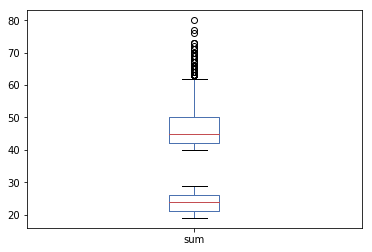

In [65]:
print("At this point. I'm abandoning ship and plotting my ship in R.")
fig = plt.figure()
ax = plt.axes()

A = vrs_90["sum"]
B = vrs_50["sum"]
A.plot(kind = 'box', layout = (2,1))
B.plot(kind = 'box', layout = (2,1))
data = [A,B]

plt.show()

#vrs["sum"].boxplot(by = "percentile")
plt.show()
#ax = fig.add_subplot(2,2,1)
#bp = boxplot(a, positions = [0], widths = 0.6)

In [ ]:
# Export peaks subsetted as percentiles
#Make .bed files for permutation tests.
dtype = ['act_sp', 'aln_sp', 'hq_act_sp', 'hq_aln_sp']
dtype = ['hq_aln_sp']
nd = {0:"vrs_0-24", 1:"vrs_25-49", 2:"vrs_50-74",3:"vrs_75-90", 4:"vrs_90"}

for item in dtype:
    val = 0 
    for binn in bins: 
        name = nd[val]
        roadmap = binn[["v-chr", "v-start", "v-end"]]
        roadmap.to_csv("%s/permutations/roadmap_%s.bed" %(result_path, name), sep = '\t', index = False, header = False)
        hspec = binn[["v-chr", "v-start", "v-end"]].loc[binn['%s' %item] == 0]
        hspec.to_csv("%s/permutations/hspec_%s_%s.bed" %(result_path, name, item), sep = '\t', index = False, header = False)
        consv = binn[["v-chr", "v-start", "v-end"]].loc[binn['%s'%item] > 0]
        consv.to_csv("%s/permutations/consv_%s_%s_species_overlap.bed" %(result_path, name ,item), sep = '\t', index = False, header = False)
        val = val +1